# **Capstone Project - Neighborhood Analysis of Bangalore, India**

### **Applied Data Science Capstone by IBM / Coursera**

## **Table of contents**
 - [Introduction: Business Problem](#introduction)
 - [Data](#data)
 - [Methodology](#methodology)
 - [Analysis](#analysis)
 - [Results and Discussion](#results)
 - [Conclusion](#conclusion)

## **Introduction: Business Problem** <a name="introduction"></a>

**Bangalore,** a city in southern India, is called "The garden city of India". It has moderate climate all year round and was considered as a perfect retirement place. However, in the past few decades, Bangalore has risen to be the **"IT capital of India"** and is also referred to as the **"Silicon Valley of India"**. It has become a popular destination for many companies from all around the world to open their offices. Likewise, the city has seen tremendous migration of people from all over India. As a result, there is a plethora of new businesses opening in the city.

In this project we will focus on finding an optimal location for opening an **Italian restaurant** in the city. For this we will focus on the following three criteria:
 - **find locations that have fewer restaurants**
 - particularly detect **areas with no Italian restaurant in the vicinity**
 - give preference to locations **closer to the city center** if the first two conditions are satisfied.
 
We will utilize the tools discussed in the IBM Data Science Professional Certificate course on Coursera to segment and analyze the neighborhoods in Bangalore based upon the above criteria. We will use the analysis to identify the top locations and discuss these to give the stakeholders enough information to decide on the location for opening an Italian restaurant.

## **Data** <a name="data"></a>

Based upon the project scope, the following factors will be considered in the analysis:

 - number of restaurants in the neighborhood
 - number of and distance to Italian restaurants in the neighborhood, if any
 - proximity of neighborhood from city center
 
I plan to use the following data for this analysis:

 - List of neighborhoods from Wikipedia (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore)
 - Information about number and types of restaurants in the neighborhoods from Foursquare
 - Use geopy library and / or Google Map to get the center coordinates of each neighborhood

## **Methodology** <a name="methodology"></a>

Two different web sites, [**Wikipedia**](https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Bangalore) and [**Popular Neighborhoods in Bangalore**](https://theculturetrip.com/asia/india/articles/the-coolest-neighbourhoods-in-bangalore), were used to highgrade neighborhoods in Bangalore. Top 15 neighborhoods were used for the analysis to investigate the recommended area to open an Italian Restaurant.

The Search Nearby option on [**Google Maps**](https://www.google.com/maps) was used to compile the coordinates for each neighborhood and save as a .csv file for analysis. The Geopy library was used to get the coordinates of Bangalore City. Folium library was used to create a map of Bangalore City with the neighborhoods imposed on top to visualize the neighborhoods within the city.

Next, [**Foursquare**](https://www.foursquare.com) was utilized to explore the neighborhoods and segment them. API queries were made to get the top 100 venues within a radius of 500 meters of each neighborhood. From the venues queried, all restaurants in the neighborhoods were selected. Some restaurants queried did not have a defined category. These were given the category called “Others”. 

From the resulting list of the restaurants the following analysis was done to investigate the recommended neighborhood for Italian Restaurant:
 - Create and visualize the number of restaurants in each neighborhood
 - Review and visualize the different restaurant types in the neighborhoods
 - Visualize the different restaurant types after dropping the “Indian Restaurants” since this restaurant type far exceeded any other restaurant type. 
 - The data frame was filtered for Italian Restaurants
 - The Italian Restaurants were then plotted on the map with neighborhoods
 
Based upon the above an analysis was done and a recommendation made.

## **Analysis** <a name="analysis"></a>

### Import libraries

In [1]:
# import libraries and dependencies

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


Load the dataset

### Load the dataset into a dataframe

In [2]:
neighborhoods = pd.read_csv('banglore_data_coordinates.csv')
print(neighborhoods.columns)
neighborhoods.drop(columns = "Unnamed: 0", inplace = True)
neighborhoods.head()

Index(['Unnamed: 0', 'Neighborhood', 'Latitude', 'Longitude'], dtype='object')


,Neighborhood,Latitude,Longitude
0,Indiranagar,12.9719,77.6412
1,Marathali,12.9592,77.6974
2,Malleswaram,13.0031,77.5643
3,Koramangala,12.9279,77.6271
4,Hebbal,13.0354,77.5988


### Use geopy library to get the latitude and longitude values of Bangalore city

In [3]:
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City are 12.9791198, 77.5912997.


### Create a map of Bangalore with neighborhoods imposed on top.

In [4]:
# create map of Bangalore using latitude and longitude values
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

### Utilize Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare credentials and version

*This code was removed for security reasons.*

In [7]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = client_id # your Foursquare ID
CLIENT_SECRET = client_secret # your Foursquare Secret
VERSION = '20190401' # Foursquare API version

### Get top 100 venues within a radius of 500 meters of each neighborhood

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

### Run above function on each neighborhood and create a new dataframe called bangalore_venues

In [9]:
bangalore_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Indiranagar
Marathali
Malleswaram
Koramangala
Hebbal
Jayanagar
Ulsoor
Whitefield
J. P. Nagar
Rajajinagar
HSR Layout
K R Puram
C V Raman Nagar
Electronic City
Mahadevapura


In [10]:
bangalore_venues

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Indiranagar,12.9719,77.6412,Vero Moda,12.972808,77.641225,Boutique
1,Indiranagar,12.9719,77.6412,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
2,Indiranagar,12.9719,77.6412,The Black Rabbit,12.969891,77.641251,Pub
3,Indiranagar,12.9719,77.6412,Chakum Chukum,12.972516,77.639152,Snack Place
4,Indiranagar,12.9719,77.6412,Red Fork,12.970314,77.642789,Café
5,Indiranagar,12.9719,77.6412,Bodycraft,12.968497,77.641289,Spa
6,Indiranagar,12.9719,77.6412,Mamagoto,12.970113,77.639173,Asian Restaurant
7,Indiranagar,12.9719,77.6412,LOFT 38,12.971167,77.641203,Lounge
8,Indiranagar,12.9719,77.6412,The Humming Tree - Music Venue and Bar,12.970125,77.639161,Music Venue
9,Indiranagar,12.9719,77.6412,Bricklane Grill,12.969920,77.641093,Restaurant


### check the size of the resulting dataframe

In [11]:
print(bangalore_venues.shape)
bangalore_venues.head()

(206, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Indiranagar,12.9719,77.6412,Vero Moda,12.972808,77.641225,Boutique
1,Indiranagar,12.9719,77.6412,Krispy Kreme Doughnuts,12.970094,77.640671,Bakery
2,Indiranagar,12.9719,77.6412,The Black Rabbit,12.969891,77.641251,Pub
3,Indiranagar,12.9719,77.6412,Chakum Chukum,12.972516,77.639152,Snack Place
4,Indiranagar,12.9719,77.6412,Red Fork,12.970314,77.642789,Café


## Select all restaurants in the neighborhoods

In [12]:
neighborhood_restaurants = bangalore_venues[bangalore_venues['Venue_Category'].str.contains("Restaurant")].reset_index(drop=True)
print(neighborhood_restaurants.shape)
neighborhood_restaurants.head()

(65, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Indiranagar,12.9719,77.6412,Mamagoto,12.970113,77.639173,Asian Restaurant
1,Indiranagar,12.9719,77.6412,Bricklane Grill,12.969920,77.641093,Restaurant
2,Indiranagar,12.9719,77.6412,Sri Udupi Park,12.973617,77.641104,Udupi Restaurant
3,Indiranagar,12.9719,77.6412,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant
4,Indiranagar,12.9719,77.6412,Mother Cluckers,12.970176,77.640243,Restaurant


## Categorize restaurants with no defined category as "Others"

In [13]:
neighborhood_restaurants.rename(columns = {'Venue': 'Restaurant', 'Venue_Latitude': 'Restaurant_Latitude', 'Venue_Longitude': 'Restaurant_Longitude', 'Venue_Category': 'Restaurant_Type'}, inplace = True)
print(neighborhood_restaurants.shape)
neighborhood_restaurants.head()

(65, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type
0,Indiranagar,12.9719,77.6412,Mamagoto,12.970113,77.639173,Asian Restaurant
1,Indiranagar,12.9719,77.6412,Bricklane Grill,12.969920,77.641093,Restaurant
2,Indiranagar,12.9719,77.6412,Sri Udupi Park,12.973617,77.641104,Udupi Restaurant
3,Indiranagar,12.9719,77.6412,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant
4,Indiranagar,12.9719,77.6412,Mother Cluckers,12.970176,77.640243,Restaurant


In [14]:
indx = neighborhood_restaurants.loc[:, 'Restaurant_Type']=='Restaurant'
neighborhood_restaurants.loc[indx, 'Restaurant_Type'] = 'Others'
print(neighborhood_restaurants.shape)
neighborhood_restaurants.head(65)

(65, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type
0,Indiranagar,12.9719,77.6412,Mamagoto,12.970113,77.639173,Asian Restaurant
1,Indiranagar,12.9719,77.6412,Bricklane Grill,12.969920,77.641093,Others
2,Indiranagar,12.9719,77.6412,Sri Udupi Park,12.973617,77.641104,Udupi Restaurant
3,Indiranagar,12.9719,77.6412,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant
4,Indiranagar,12.9719,77.6412,Mother Cluckers,12.970176,77.640243,Others
5,Indiranagar,12.9719,77.6412,Phobidden Fruit,12.969959,77.639620,Vietnamese Restaurant
6,Indiranagar,12.9719,77.6412,The Fatty Bao,12.970430,77.645103,Asian Restaurant
7,Indiranagar,12.9719,77.6412,Bhartiya Jalpan,12.968684,77.641482,Others
8,Indiranagar,12.9719,77.6412,Cream Centre,12.971448,77.641181,Indian Restaurant
9,Indiranagar,12.9719,77.6412,Chili's,12.969237,77.641414,Tex-Mex Restaurant


In [15]:
# unique categories of restaurants
print('There are {} uniques categories.'.format(len(neighborhood_restaurants['Restaurant_Type'].unique())))

There are 18 uniques categories.


In [16]:
# number of restaurants for each neighborhood
restaurants = neighborhood_restaurants.groupby('Neighborhood').count()
restaurants.head()

,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type
Neighborhood,,,,,,
C V Raman Nagar,2,2,2,2,2,2
HSR Layout,3,3,3,3,3,3
Hebbal,2,2,2,2,2,2
Indiranagar,15,15,15,15,15,15
J. P. Nagar,18,18,18,18,18,18


## Create a bar chart of the number of restaurants in each neighborhood

In [17]:
restaurants.sort_values(by = "Restaurant_Type", ascending = False, inplace = True)
restaurants.head()

,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type
Neighborhood,,,,,,
J. P. Nagar,18,18,18,18,18,18
Indiranagar,15,15,15,15,15,15
Jayanagar,12,12,12,12,12,12
Rajajinagar,4,4,4,4,4,4
HSR Layout,3,3,3,3,3,3


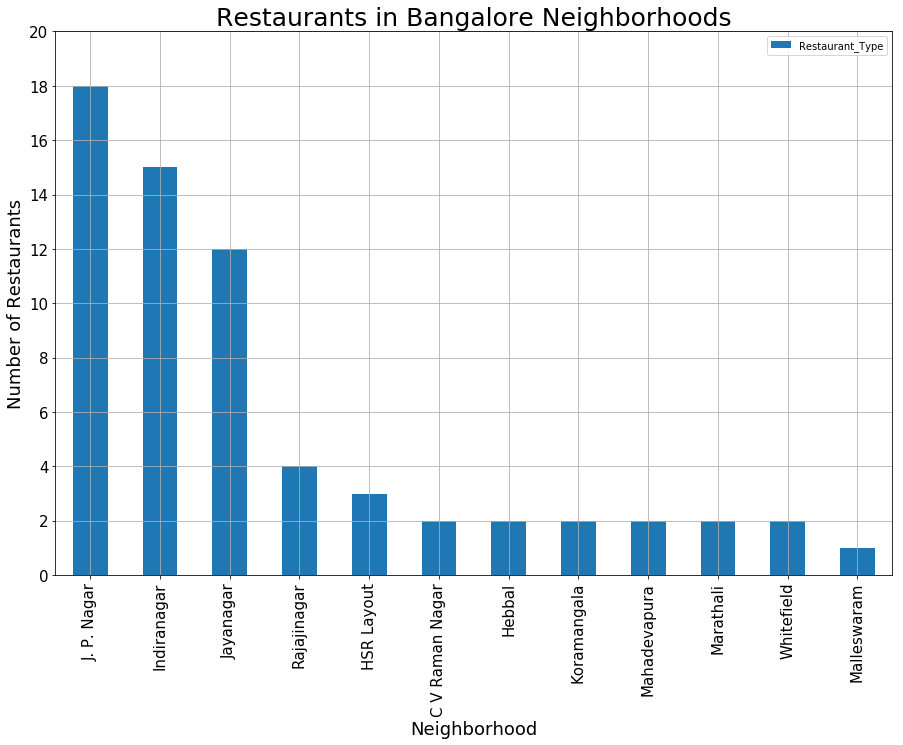

In [18]:
restaurants.plot(y = 'Restaurant_Type', kind='bar', figsize=(15, 10), fontsize = 15)

plt.xlabel('Neighborhood', fontsize = 18) # add to x-label to the plot
plt.ylabel('Number of Restaurants', fontsize = 18,) # add y-label to the plot
plt.title('Restaurants in Bangalore Neighborhoods', fontsize = 25) # add title to the plot
plt.yticks(range(0,21, 2))
plt.grid()
plt.show()

In [19]:
# number of restaurants for each neighborhood
restaurant_types = neighborhood_restaurants.groupby('Restaurant_Type').count()
restaurant_types.head(15)

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude
Restaurant_Type,,,,,,
Andhra Restaurant,1,1,1,1,1,1
Asian Restaurant,3,3,3,3,3,3
Bengali Restaurant,1,1,1,1,1,1
Chinese Restaurant,4,4,4,4,4,4
Eastern European Restaurant,1,1,1,1,1,1
Fast Food Restaurant,1,1,1,1,1,1
Hyderabadi Restaurant,1,1,1,1,1,1
Indian Restaurant,35,35,35,35,35,35
Italian Restaurant,2,2,2,2,2,2


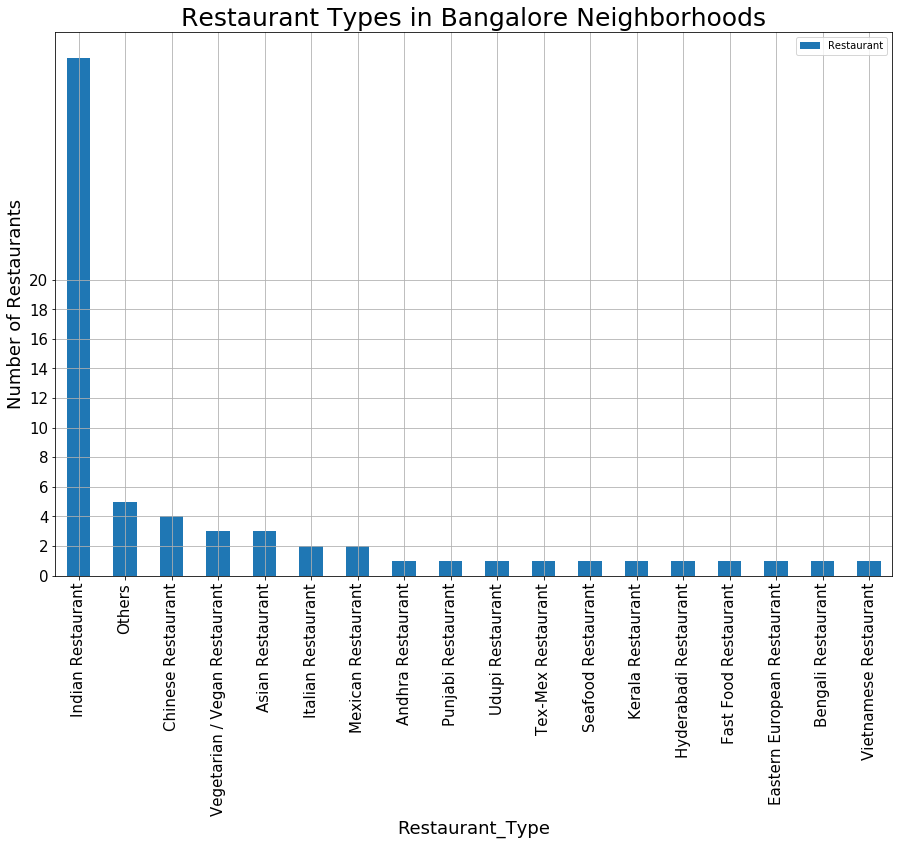

In [20]:
restaurant_types.sort_values(by = "Restaurant", ascending = False, inplace = True)
restaurant_types.plot(y = 'Restaurant', kind='bar', figsize=(15, 10), fontsize = 15)

plt.xlabel('Restaurant_Type', fontsize = 18) # add to x-label to the plot
plt.ylabel('Number of Restaurants', fontsize = 18,) # add y-label to the plot
plt.title('Restaurant Types in Bangalore Neighborhoods', fontsize = 25) # add title to the plot
plt.yticks(range(0,21, 2))
plt.grid()
plt.show()

## Drop Indian Restaurant type

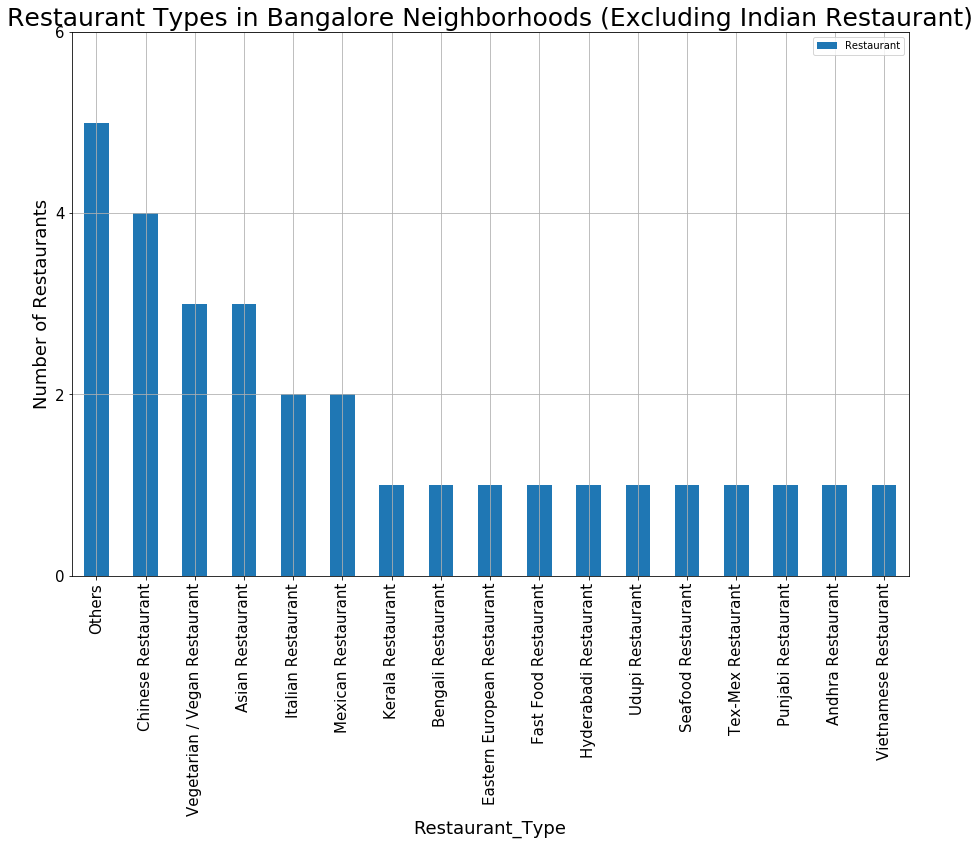

In [21]:
indx2 = restaurant_types.index[restaurant_types.index.isin(['Indian Restaurant'])]
restaurant_types_2 = restaurant_types.drop(index = indx2)
restaurant_types_2.sort_values(by = "Restaurant", ascending = False, inplace = True)
restaurant_types_2.plot(y = 'Restaurant', kind='bar', figsize=(15, 10), fontsize = 15)

plt.xlabel('Restaurant_Type', fontsize = 18) # add to x-label to the plot
plt.ylabel('Number of Restaurants', fontsize = 18,) # add y-label to the plot
plt.title('Restaurant Types in Bangalore Neighborhoods (Excluding Indian Restaurant)', fontsize = 25) # add title to the plot
plt.yticks(range(0,7, 2))
plt.grid()
plt.show()

In [22]:
indx3 = neighborhood_restaurants.loc[neighborhood_restaurants.loc[:, 'Restaurant_Type'].isin(['Italian Restaurant'])].index
indx3

Int64Index([3, 13], dtype='int64')

In [23]:
neighborhood_restaurants.loc[:, 'Italian Restaurant'] = 0
neighborhood_restaurants.loc[indx3, 'Italian Restaurant'] = 1
neighborhood_restaurants.head()

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type,Italian Restaurant
0,Indiranagar,12.9719,77.6412,Mamagoto,12.970113,77.639173,Asian Restaurant,0
1,Indiranagar,12.9719,77.6412,Bricklane Grill,12.969920,77.641093,Others,0
2,Indiranagar,12.9719,77.6412,Sri Udupi Park,12.973617,77.641104,Udupi Restaurant,0
3,Indiranagar,12.9719,77.6412,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant,1
4,Indiranagar,12.9719,77.6412,Mother Cluckers,12.970176,77.640243,Others,0


## Filter dataframe for Italian Retaurants

In [24]:
italian_restaurants = neighborhood_restaurants.loc[neighborhood_restaurants.loc[:, 'Restaurant_Type'].isin(['Italian Restaurant'])]
#italian_restaurants.rename(columns = {'Restaurant Latitute': 'lat', 'Restaurant Longitude': 'lng', 'Italian Restaurant': 'Italian'}, inplace = True)
italian_restaurants

,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Restaurant,Restaurant_Latitude,Restaurant_Longitude,Restaurant_Type,Italian Restaurant
3,Indiranagar,12.9719,77.6412,Chianti Ristorante & Wine Bar,12.970167,77.640346,Italian Restaurant,1
13,Indiranagar,12.9719,77.6412,Terrazzo,12.969337,77.641404,Italian Restaurant,1


## Visualize the Italian Restaurants

In [25]:
map_italian_restaurants = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_italian_restaurants)  
    
# add the Italian restaurants as red circle markers
#for lat, lng, neighborhood in zip(italian_restaurants['Restaurant_Latitude'], italian_restaurants['Restaurant_Longitude'], italian_restaurants['Neighborhood']):

for lat, lng, neighborhood in zip(italian_restaurants.Restaurant_Latitude, italian_restaurants.Restaurant_Longitude, italian_restaurants.Restaurant):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(map_italian_restaurants)

# display map
map_italian_restaurants

### **Results and Discussion**<a name="results"></a>

My analysis shows that although there is a fairly large number of restaurants in the selected neighborhoods in Bangalore City (~65 restaurants in the 15 popular neighborhoods). The top 3 neighborhoods with the highest number of restaurants were J. P. Nagar, Indiranagar, and Jayanagar.

A closer look at the restaurant types showed that there is a predominance of Indian Restaurants in the neighborhoods. Of the 65 total restaurants in the 15 queried neighborhoods, 35 were Indian Restaurants. I narrowed the search to look for Italian Restaurants in the neighborhoods and found that there were only 2 Italian Restaurant, and both were in the Indiranagar neighborhood.

The result of my analysis is that all neighborhoods, other than Indiranagar, are probable candidates for opening an Italian Restaurant. Further, since the neighborhoods of J. P. Nagar and Jayanagr have 18 and 12 restaurants (any kind) respectively, choosing a neighborhood other that these 3 neighborhoods (Indiranagar, J. P. Nagar, and Jayanagar) could serve the dual purpose of lesser competion from any restaurant type and no competition from Italian Restaurant type.

This does not imply that Indiranagar, J. P. Nagar, and Jayanager and not good locations for Italian Restaurant. The purpose of this analysis was to only provide information about Bangalore neighborhoods that are not crowded with restaurants, particularly Italian. It is possible that, for any reason, an Italian Restaurant in a neighborhood with smaller number of restaurants and no Italian Restaurant could be unsuitable for a new restaurant regardless of the lack of competition in the area. Recommended neighborhoods should be considered as a starting point for a detailed analysis which considers other factors in addition to the number of restaurants and competition.

### **Conclusion**<a name="conclusion"></a>

The goal of this project was to analyze the neighborhoods in Bangalore, India to identify neighborhoods with lower number of restaurants, particularly Italian Restaurants. This would aid the stakeholders in narrowing down the search for an optimal location for an Italian Restaurant in Bangalore. By getting the restaurant data from Foursquare, calculating the restaurant density distribution, and visualizing the results in the form of bar charts and maps, it was apparent that the neighborhoods of Indiranagar, J. P. Nagar, and Jayanagar had the highest restaurant density. There were only 2 Italian Restaurants, and both were in the neighborhood of Indiranagar. This suggested that the first step is to select any neighborhood other than Indiranagar, J. P. Nagar, and Jayanagar to avoid competition from both the existing restaurants, particularly Italian Restaurants. However, for reasons not explored in this study, these 3 locations could also be good candidates for a new restaurant despite competition from the existing restaurants.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (number of offices and malls), proximity to major roads and local train locations, potential future growth of residential areas and new offices, social and economic dynamics of each neighborhood etc.
